In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('HSall_members.csv')
print(data.shape)

(49935, 22)


In [8]:
congress = int(input('Which congress would you like to use for analysis?'))
chamber = input('Which chamber House/Senate would you like to use for analysis?')

prez = data[(data['chamber'] == 'President') & (data['congress'] == congress)]
pres_mult = ''
num = ''
if (len(prez) != 1):
    pres_mult = pd.DataFrame({'' : prez['bioname']})
    pres_mult.reset_index(drop = True, inplace = True)
    pres_mult.index = pres_mult.index + 1
    print(pres_mult)
    num = int(input('Multiple presidents who presided over that congress, type the number of the one you want to use:'))
    prez = prez.iloc[num-1]
    prez = prez.to_frame().transpose()
p = float(prez['nominate_dim1'])

sim_data = data[(data['congress'] == congress) & (data['chamber'] == chamber)]
sim_data.reset_index(drop = True, inplace = True)
sim_data


Which congress would you like to use for analysis?115
Which chamber House/Senate would you like to use for analysis?Senate


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,115,Senate,41704,41,0.0,AL,200,NaN,NaN,"STRANGE, Luther Johnson, III",...,NaN,0.560,0.180,-10.12332,0.95801,236.0,4.0,NaN,0.570,0.225
1,115,Senate,41705,41,0.0,AL,100,NaN,NaN,"JONES, Gordon Douglas (Doug)",...,NaN,-0.088,0.187,-37.36526,0.84182,217.0,19.0,NaN,-0.113,0.108
2,115,Senate,49700,41,0.0,AL,200,NaN,NaN,"SESSIONS, Jefferson Beauregard III (Jeff)",...,NaN,0.549,0.130,-0.56654,0.97062,19.0,0.0,NaN,0.357,0.241
3,115,Senate,94659,41,0.0,AL,200,NaN,NaN,"SHELBY, Richard C.",...,NaN,0.445,0.571,-26.74029,0.94978,519.0,14.0,NaN,0.394,0.490
4,115,Senate,40300,81,0.0,AK,200,NaN,NaN,"MURKOWSKI, Lisa",...,NaN,0.210,-0.303,-62.17995,0.88437,506.0,21.0,NaN,0.229,-0.259
5,115,Senate,41500,81,0.0,AK,200,NaN,NaN,"SULLIVAN, Daniel Scott",...,NaN,0.475,0.071,-39.61914,0.92469,506.0,16.0,NaN,0.470,0.008
6,115,Senate,15039,61,0.0,AZ,200,NaN,NaN,"McCAIN, John Sidney, III",...,2018.0,0.381,-0.626,-41.58471,0.85272,261.0,18.0,NaN,0.394,-0.762
7,115,Senate,15429,61,0.0,AZ,200,NaN,NaN,"KYL, Jon Llewellyn",...,NaN,0.548,-0.413,-8.46959,0.87605,64.0,2.0,NaN,0.586,0.272
8,115,Senate,20100,61,0.0,AZ,200,NaN,NaN,"FLAKE, Jeff",...,NaN,0.855,-0.518,-62.93724,0.87639,477.0,28.0,NaN,0.853,-0.522
9,115,Senate,20101,42,0.0,AR,200,NaN,NaN,"BOOZMAN, John",...,NaN,0.417,0.283,-18.29029,0.96537,519.0,5.0,NaN,0.383,0.333


In [27]:
data_trim = pd.DataFrame({'Name': sim_data['bioname'], 'State': sim_data['state_abbrev'], 'Party': sim_data['party_code'], 'nominate_dim1' : sim_data['nominate_dim1'], 'nominate_dim2' : sim_data['nominate_dim2']})
data_trim.sort_values(by=['nominate_dim1'], inplace = True)
data_trim.reset_index(drop = True, inplace = True)
data_trim


,Name,State,Party,nominate_dim1,nominate_dim2
0,"WARREN, Elizabeth",MA,100,-0.759,-0.307
1,"HARRIS, Kamala Devi",CA,100,-0.709,-0.105
2,"BOOKER, Cory Anthony",NJ,100,-0.592,-0.264
3,"SANDERS, Bernard",VT,328,-0.532,-0.401
4,"MARKEY, Edward John",MA,100,-0.513,-0.459
5,"HIRONO, Mazie",HI,100,-0.512,-0.085
6,"BALDWIN, Tammy",WI,100,-0.492,-0.139
7,"GILLIBRAND, Kirsten",NY,100,-0.474,-0.426
8,"OSSOFF, Thomas Jonathan (Jon)",GA,100,-0.460,0.506
9,"SCHATZ, Brian Emanuel",HI,100,-0.443,-0.106


In [28]:
#Pivotal Actors
f_p = ''
f = ''
m_v = ''
m = ''
v_p = ''
v = ''

if (p > 0):
    f_p = data_trim.iloc[np.quantile(np.arange(0, len(data_trim)+1), 0.4, interpolation='higher')]
    f_p = f_p.to_frame().transpose()
    f = float(f_p['nominate_dim1'])
    m_v = data_trim.iloc[np.quantile(np.arange(0, len(data_trim)+1), 0.5, interpolation='lower')]
    m_v = m_v.to_frame().transpose()
    m = float(m_v['nominate_dim1'])
    v_p = data_trim.iloc[np.quantile(np.arange(0, len(data_trim)+1), 0.6667, interpolation='lower')]
    v_p = v_p.to_frame().transpose()
    v = float(v_p['nominate_dim1'])
elif (p < 0):
    f_p = data_trim.iloc[np.quantile(np.arange(0, len(data_trim)+1), 0.6, interpolation='higher')]
    f_p = f_p.to_frame().transpose()
    f = float(f_p['nominate_dim1'])
    m_v = data_trim.iloc[np.quantile(np.arange(0, len(data_trim)+1), 0.5, interpolation='higher')]
    m_v = m_v.to_frame().transpose()
    m = float(m_v['nominate_dim1'])
    v_p = data_trim.iloc[np.quantile(np.arange(0, len(data_trim)+1), 0.3334, interpolation='higher')]
    v_p = v_p.to_frame().transpose()
    v = float(v_p['nominate_dim1'])


In [29]:
#Regions
B1 = ''
R1 = ''
B2 = ''
R2 = ''
B3 = ''
R3 = ''
B4 = ''
R4 = ''
R5 = ''

if (abs(v-m) <= abs(p-m)):
    B2 = round(f,3)
    B3 = round(v,3)

    if (p > 0):
        B1 = round((f - abs(f-m)),3)
        B4 = round((v + abs(v-m)),3)
        R1 = np.arange(-1, B1 + 0.001, 0.001).round(3)
        R2 = np.arange(B1, B2 + 0.001, 0.001).round(3)
        R3 = np.arange(B2, B3 + 0.001, 0.001).round(3)
        R4 = np.arange(B3, B4 + 0.001, 0.001).round(3)
        R5 = np.arange(B4, 1 + 0.001, 0.001).round(3)

    elif (p < 0):
        B1 = round((f + abs(f-m)),3)
        B4 = round((v - abs(v-m)),3)
        R1 = np.arange(B1, 1 + 0.001, 0.001).round(3)
        R2 = np.arange(B2, B1, 0.001).round(3)
        R3 = np.arange(B3, B2, 0.001).round(3)
        R4 = np.arange(B4, B3, 0.001).round(3)
        R5 = np.arange(-1, B4, 0.001).round(3)
else:
    B2 = round(f,3)
    B3 = round(p,3)

    if (p > 0):
        B1 = round((f - abs(f-m)),3)
        B4 = round((p + abs(p-m)),3)
        R1 = np.arange(-1, B1, 0.001).round(3)
        R2 = np.arange(B1, B2, 0.001).round(3)
        R3 = np.arange(B2, B3, 0.001).round(3)
        R4 = np.arange(B3, B4, 0.001).round(3)
        R5 = np.arange(B4, 1 + 0.001, 0.001).round(3)

    elif (p < 0):
        B1 = round((f + abs(f-m)),3)
        B4 = round((p - abs(p-m)),3)
        R1 = np.arange(B1, 1 + 0.001, 0.001).round(3)
        R2 = np.arange(B2, B1 + 0.001, 0.001).round(3)
        R3 = np.arange(B3, B2 + 0.001, 0.001).round(3)
        R4 = np.arange(B4, B3 + 0.001, 0.001).round(3)
        R5 = np.arange(-1, B4 + 0.001, 0.001).round(3)


What status quo point would you like to assess?0.37
The status quo lies within the gridlock interval, so any proposed policy will be halted by fillibuster or veto.


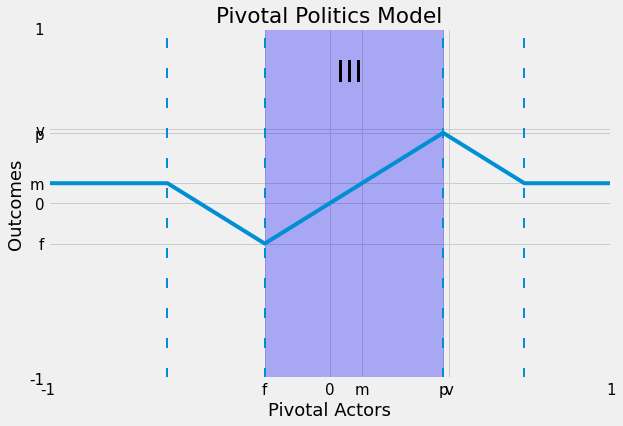

In [38]:
q = float(input('What status quo point would you like to assess?'))

if (p > 0):
    #Region 1
    if (q in R1):
        print('The policy will converge to the median: ' + str(m) + ' which is closest to ' + m_v['Name'].values)

    #Region 2
    elif (q in R2):
        outcome = round((((f-m)/(f-B1))*(q-B1))+m, 3)
        member_check = list(round(abs(data_trim['nominate_dim1'] - outcome),3))
        min_index = member_check.index(min(member_check))
        print('The policy will converge to: ' + str(outcome) + ' which is closest to ' + data_trim['Name'].iloc[min_index])

    #Region 3
    elif (q in R3):
        print('The status quo lies within the gridlock interval, so any proposed policy will be halted by fillibuster or veto.')

    #Region 4
    elif (q in R4):
        outcome = round((((v-m)/(v-B4))*(q-B4))+m, 3) #B1-f => f-B1 & m-f => f-min alternate
        member_check = list(round(abs(data_trim['nominate_dim1'] - outcome),3))
        min_index = member_check.index(min(member_check))
        print('The policy will converge to: ' + str(outcome) + ' which is closest to ' + data_trim['Name'].iloc[min_index])

    #Region 5
    if (q in R5):
        print('The policy will converge to the median: ' + str(m) + ' which is closest to ' + m_v['Name'].values)
         
elif (p < 0):
    #Region 1
    if (q in R1):
        print('The policy will converge to the median: ' + str(m) + ' which is closest to ' + m_v['Name'].values)

    #Region 2
    elif (q in R2):
        outcome = round((((m-f)/(B1-f))*(q-B1))+m, 3) #B1-f => f-B1 & m-f => f-min alternate
        member_check = list(round(abs(data_trim['nominate_dim1'] - outcome),3))
        min_index = member_check.index(min(member_check))
        print('The policy will converge to: ' + str(outcome) + ' which is closest to ' + data_trim['Name'].iloc[min_index])

    #Region 3
    elif (q in R3):
        print('The status quo lies within the gridlock interval, so any proposed policy will be halted by fillibuster or veto.')

    #Region 4
    elif (q in R4):
        outcome = round((((v-m)/(v-B4))*(q-B4))+m, 3) #B1-f => f-B1 & m-f => f-min alternate
        member_check = list(round(abs(data_trim['nominate_dim1'] - outcome),3))
        min_index = member_check.index(min(member_check))
        print('The policy will converge to: ' + str(outcome) + ' which is closest to ' + data_trim['Name'].iloc[min_index])

    #Region 5
    if (q in R5):
        print('The policy will converge to the median: ' + str(m) + ' which is closest to ' + m_v['Name'].values)
    
if (abs(v-m) <= abs(p-m)):
    matplotlib.rcParams.update({'font.size': 15})
    plt.subplots(figsize=(9, 6))
    plt.xlabel("Pivotal Actors")  
    plt.ylabel("Outcomes")  
    plt.title("Pivotal Politics Model")
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    xs = [-1,f, 0, m, v, p, 1]
    ys = [-1,f, 0, m, v, p, 1]
    xlabels = ['-1','f', '0', 'm', 'v', 'p', '1']
    ylabels = ['-1','f', '0', 'm', 'v', 'p', '1']
    plt.xticks(xs,xlabels)
    plt.yticks(ys,ylabels)

    plt.axvline(B1, linewidth=2, dashes=[5,10])
    plt.axvline(B2, linewidth=2, dashes=[5,10])
    plt.axvline(B3, linewidth=2, dashes=[5,10])
    plt.axvline(B4, linewidth=2, dashes=[5,10])

    x_values = []
    y_values = []

    if (p > 0): 
        x_values = [-1, B1, B2, B3, B4, 1]
        y_values = [m, m, f, v, m, m] 
        if (q in R1):
            plt.axvspan(-1, B1, color='blue', alpha=0.3)
            plt.text(x=-1+2*((B1-(-1))/5), y=0.7, s='I', fontsize = 30)
        elif (q in R2):
            plt.axvspan(B1, B2, color='blue', alpha=0.3)
            plt.text(x=B1+2*((B2-B1)/5), y=0.7, s='II', fontsize = 30)
        elif (q in R3):
            plt.axvspan(B2, B3, color='blue', alpha=0.3)
            plt.text(x=B2+2*((B3-B2)/5), y=0.7, s='III', fontsize = 30)
        elif (q in R4):
            plt.axvspan(B3, B4, color='blue', alpha=0.3)
            plt.text(x=B3+2*((B4-B3)/5), y=0.7, s='IV', fontsize = 30)
        elif (q in R5):
            plt.axvspan(B4, 1, color='blue', alpha=0.3)
            plt.text(x=B4+2*((1-B4)/5), y=0.7, s='V', fontsize = 30)

    elif (p < 0): 
        x_values = [1, B1, B2, B3, B4, -1]
        y_values = [m, m, f, v, m, m]
        if (q in R1):
            plt.axvspan(B1, 1, color='blue', alpha=0.3)
            plt.text(x=B1+2*((1-B1)/5), y=0.7, s='I', fontsize = 30)
        elif (q in R2):
            plt.axvspan(B2, B1, color='blue', alpha=0.3)
            plt.text(x=B2+2*((B1-B2)/5), y=0.7, s='II', fontsize = 30)
        elif (q in R3):
            plt.axvspan(B3, B2, color='blue', alpha=0.3)
            plt.text(x=B3+2*((B2-B3)/5), y=0.7, s='III', fontsize = 30)
        elif (q in R4):
            plt.axvspan(B4, B3, color='blue', alpha=0.3)
            plt.text(x=B4+2*((B3-B4)/5), y=0.7, s='IV', fontsize = 30)
        elif (q in R5):
            plt.axvspan(-1, B4, color='blue', alpha=0.3)
            plt.text(x=-1+2*((B4-(-1))/5), y=0.7, s='V', fontsize = 30)

    plt.plot(x_values, y_values)
    
else:
    matplotlib.rcParams.update({'font.size': 15})
    plt.subplots(figsize=(9, 6))
    plt.xlabel("Pivotal Actors")  
    plt.ylabel("Outcomes")  
    plt.title("Pivotal Politics Model")
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    xs = [-1,f, 0, m, p, v, 1]
    ys = [-1,f, 0, m, p, v, 1]
    xlabels = ['-1','f', '0', 'm', 'p', 'v', '1']
    ylabels = ['-1','f', '0', 'm', 'p', 'v', '1']
    plt.xticks(xs,xlabels)
    plt.yticks(ys,ylabels)

    plt.axvline(B1, linewidth=2, dashes=[5,10])
    plt.axvline(B2, linewidth=2, dashes=[5,10])
    plt.axvline(B3, linewidth=2, dashes=[5,10])
    plt.axvline(B4, linewidth=2, dashes=[5,10])

    x_values = []
    y_values = []

    if (p > 0): 
        x_values = [-1, B1, B2, B3, B4, 1]
        y_values = [m, m, f, p, m, m]
        if (q in R1):
            plt.axvspan(-1, B1, color='blue', alpha=0.3)
            plt.text(x=-1+2*((B1-(-1))/5), y=0.7, s='I', fontsize = 30)
        elif (q in R2):
            plt.axvspan(B1, B2, color='blue', alpha=0.3)
            plt.text(x=B1+2*((B2-B1)/5), y=0.7, s='II', fontsize = 30)
        elif (q in R3):
            plt.axvspan(B2, B3, color='blue', alpha=0.3)
            plt.text(x=B2+2*((B3-B2)/5), y=0.7, s='III', fontsize = 30)
        elif (q in R4):
            plt.axvspan(B3, B4, color='blue', alpha=0.3)
            plt.text(x=B3+2*((B4-B3)/5), y=0.7, s='IV', fontsize = 30)
        elif (q in R5):
            plt.axvspan(B4, 1, color='blue', alpha=0.3)
            plt.text(x=B4+2*((1-B4)/5), y=0.7, s='V', fontsize = 30)

    elif (p < 0): 
        x_values = [1, B1, B2, B3, B4, -1]
        y_values = [m, m, f, p, m, m]
        if (q in R1):
            plt.axvspan(B1, 1, color='blue', alpha=0.3)
            plt.text(x=B1+2*((1-B1)/5), y=0.7, s='I', fontsize = 30)
        elif (q in R2):
            plt.axvspan(B2, B1, color='blue', alpha=0.3)
            plt.text(x=B2+2*((B1-B2)/5), y=0.7, s='II', fontsize = 30)
        elif (q in R3):
            plt.axvspan(B3, B2, color='blue', alpha=0.3)
            plt.text(x=B3+2*((B2-B3)/5), y=0.7, s='III', fontsize = 30)
        elif (q in R4):
            plt.axvspan(B4, B3, color='blue', alpha=0.3)
            plt.text(x=B4+2*((B3-B4)/5), y=0.7, s='IV', fontsize = 30)
        elif (q in R5):
            plt.axvspan(-1, B4, color='blue', alpha=0.3)
            plt.text(x=-1+2*((B4-(-1))/5), y=0.7, s='V', fontsize = 30)

    plt.plot(x_values, y_values)
    

   
          